# **Fuel Economy Prediction Model**

In this project, I aim to predict vehicle fuel efficiency (mpg) using linear regression with Python. Leveraging pandas, scikit-learn, and statsmodels, I will build and evaluate a model based on features like cylinders, displacement, horsepower, weight, acceleration, model year, origin, and car name. The process includes data cleaning, exploration, feature selection, and model evaluation, addressing challenges such as inconsistent data formats and missing values. The result will be an accurate model and insights into factors affecting fuel efficiency.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [260]:
fuel_df = pd.read_csv('auto-mpg.csv')
fuel_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### **EDA**

In [261]:
# check datatypes

fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [262]:
# check for missig values

fuel_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [263]:
# horsepower seems like it should be int but is object when trying to convert i get error 
# after checking i discovered that there are ? in 6 lines
fuel_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [265]:
fuel_df[fuel_df['horsepower'] == '?'] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [266]:
# as it is a small dataset it is worth filling in the data, as there are only 6 lines i found the details online
fuel_df.loc[fuel_df['horsepower'] == '?', 'horsepower'] = pd.Series({
    32: 75,
    126: 140,
    330: 40,
    336: 134,
    354: 52,
    374: 110
})

# there is a strong correlatio between horsepower and mpg so i will include it in the model

In [269]:
fuel_df.loc[[32, 126, 130, 336, 354, 374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,75,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,140,2875,17.0,74,1,ford maverick
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
336,23.6,4,140.0,134,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,52,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,110,3035,20.5,82,1,amc concord dl


In [270]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [271]:
fuel_df['horsepower'] = fuel_df['horsepower'].astype('int64')

In [272]:
# check for outliers / general data composition

fuel_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.278894,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.525141,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,40.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,128.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [321]:
# change origin to category

fuel_df['origin'] = fuel_df['origin'].astype(object)

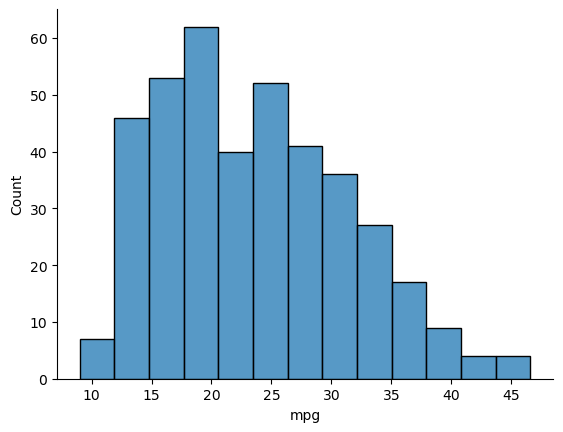

In [323]:
sns.histplot(fuel_df['mpg'])
sns.despine();

# not fully normal distribution, may need log transform

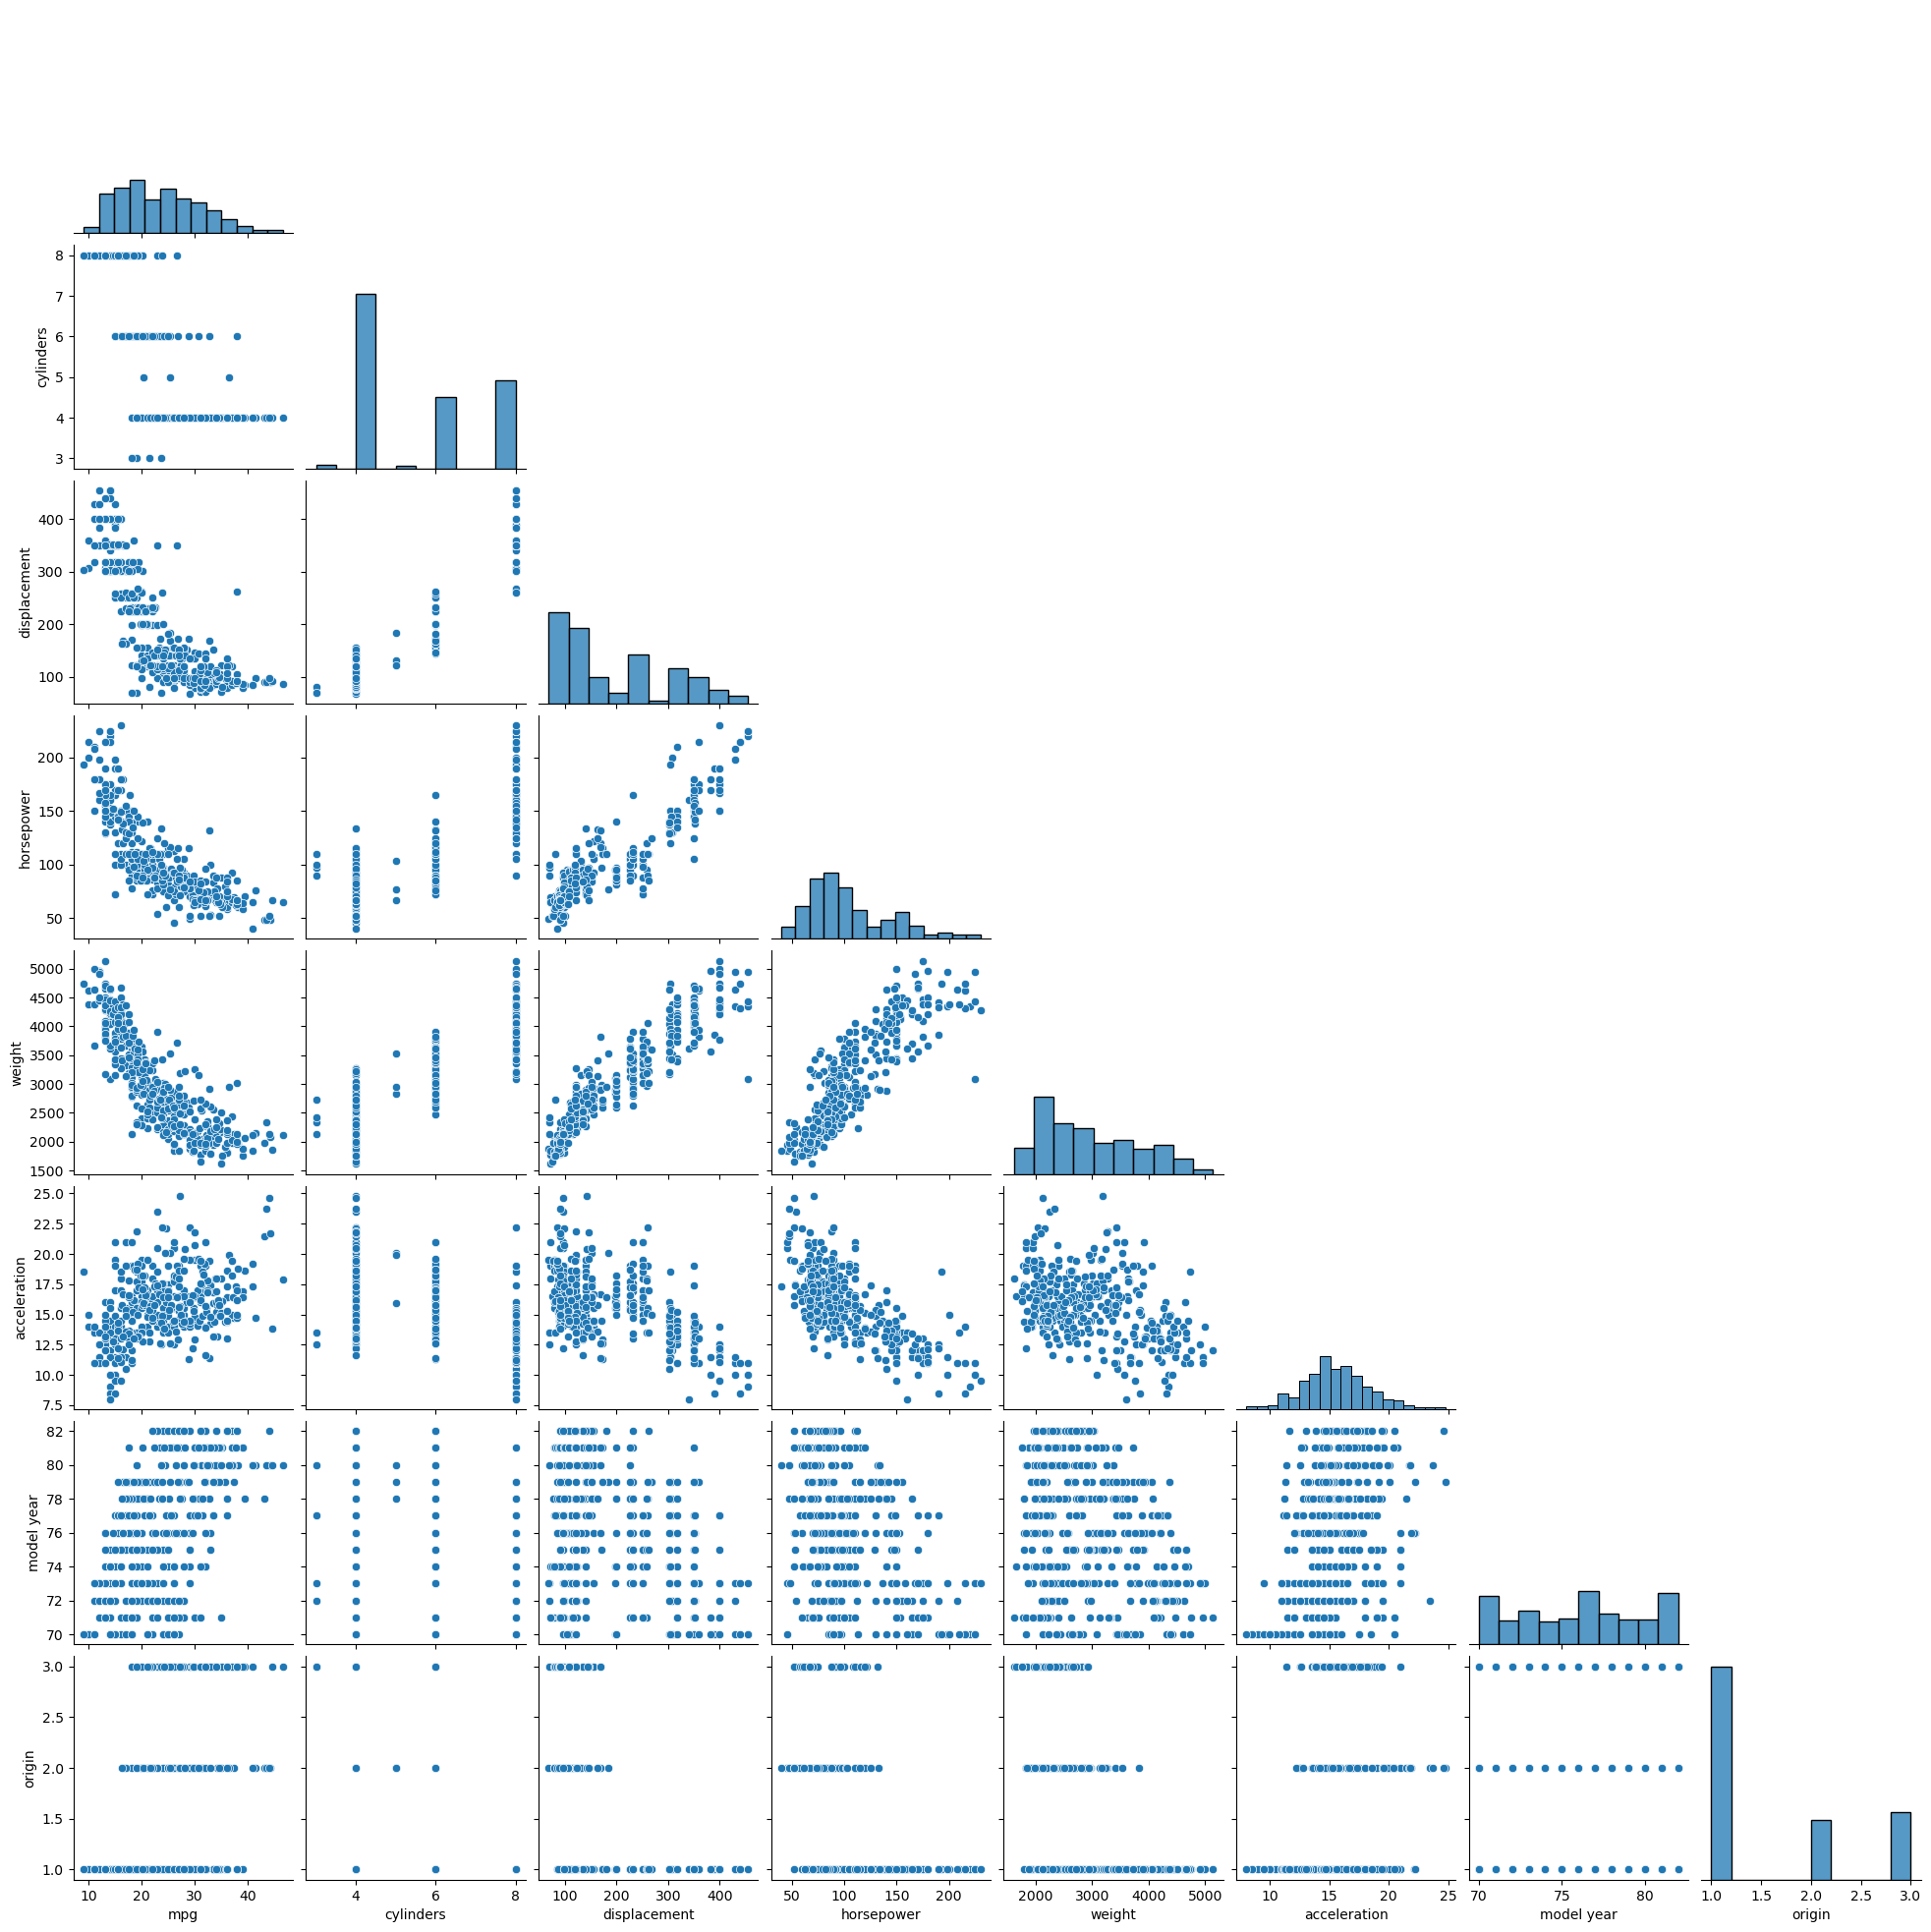

In [275]:
# explre rationship between all numeric data

sns.pairplot(fuel_df, corner = True);

In [276]:
# check correlation

fuel_df.corr(numeric_only = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.780224,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838812,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.894316,0.932824,-0.543684,-0.370164
horsepower,-0.780224,0.838812,0.894316,1.000000,0.863300,-0.682838,-0.413329
weight,-0.831741,0.896017,0.932824,0.863300,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.682838,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413329,-0.306564,0.288137,1.000000


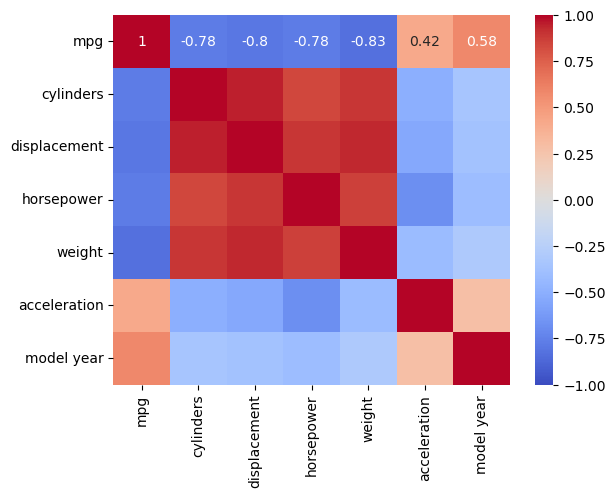

In [325]:
sns.heatmap(fuel_df.corr(numeric_only = True), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

In [324]:
# the strongest negative relationship is between mpg and weight , displacement, cylinders and horsepower
# there are a number of high feature-feature correlations (weight, displacement, cylinders, horsepower)
# the weakest ralationship is betweeen mgs and acceleration

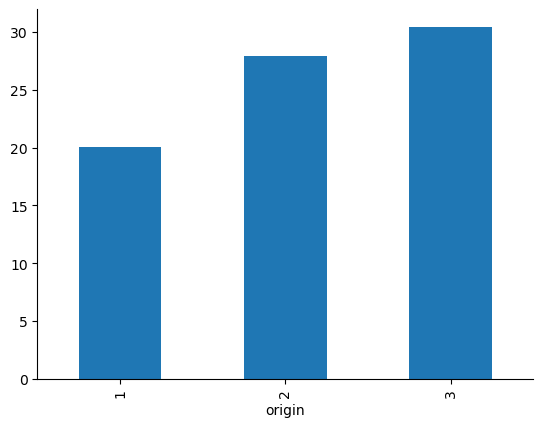

In [279]:
fuel_df.groupby('origin')['mpg'].mean().plot.bar();
sns.despine();

#there seems to be a relationship between origin ad mpg

In [280]:
# check car name column
# this would require bining data as our of 398 rows 305 are unique car names, exclude from the model for now

fuel_df['car name'].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

### **Prepare Data for Modelling**

In [329]:
model_fuel_df = (
    fuel_df
    .drop('car name', axis = 1)
    .assign(
        weight_sq = fuel_df['weight'] ** 2
    )
)
model_fuel_df = pd.get_dummies(model_fuel_df, drop_first = True, dtype = int)
model_fuel_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight_sq,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140,3449,10.5,70,11895601,0,0


In [330]:
model_fuel_df.columns.to_list()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'weight_sq',
 'origin_2',
 'origin_3']

In [283]:
# import all modeles i will for linear regression

import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

In [419]:
# splitting data
# there are a number of highly correlated features (multicollinearity issue) 
# I will start fitting model on weight which is teh highest correlated feature
# then i will add features that are not highly correlated to each other

features = [
 # 'cylinders',
 # 'displacement',
 # 'horsepower',
 'weight',
 # 'weight_sq',
 # 'acceleration',
 'model year',
 'origin_2',
 'origin_3'
]

X = sm.add_constant(model_fuel_df[features])
# y = model_fuel_df['mpg']
y = np.log(model_fuel_df['mpg'])

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 2023)

### **Model fitting**

In [420]:
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     430.1
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          2.74e-106
Time:                        13:05:19   Log-Likelihood:                 166.58
No. Observations:                 238   AIC:                            -323.2
Df Residuals:                     233   BIC:                            -305.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3221      0.186      7.125      0.000       0.956       1.688
weight        -0.0003   1.22e-05    -23.342      0.000      -0.000      -0.000
model year     0.0342      0.002     15.285      0.000       0.030       0.039
origin_2       0.0992      0.023      4.305      0.000       0.054       0.145
origin_3       0.0729      0.024      3.028      0.003       0.025       0.120
==============================================================================
Omnibus:                        4.388   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.244
Skew:                          -0.232   Prob(JB):                        0.120
Kurtosis:                       3.460   Cond. No.                     7.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [421]:
# as the data set is small i am using cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 2023)

#create a list to store validation scores for each fold
# cv for cross validation
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X ,y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(np.exp(y_val), np.exp(model.predict(X_val),)))

print('All Validations R2s: ', [round(x, 3) for x in cv_lm_r2s])
print(f'Cross Validations R2s: {round(np.mean(cv_lm_r2s),3)} +-  {round(np.std(cv_lm_r2s),3)}')
print()
print('All Validations MAEs: ', [round(x, 3) for x in cv_lm_mae])
print(f'Cross Validations MAEs: {round(np.mean(cv_lm_mae),3)} +-  {round(np.std(cv_lm_mae),3)}')

All Validations R2s:  [0.879, 0.874, 0.876, 0.84, 0.892]
Cross Validations R2s: 0.872 +-  0.017

All Validations MAEs:  [1.836, 2.036, 2.182, 2.143, 2.486]
Cross Validations MAEs: 2.137 +-  0.212


In [422]:
# only weight - train 0.671, valid 0.775 (assumtion checking at this stage)
# add model year, origin_2, origin_3 -  train 0.821, valid 0.844
# add model year, origin_2, origin_3, log target -  train 0.881, valid 0.872

### **Check model assumptions L.I.N.N.E**

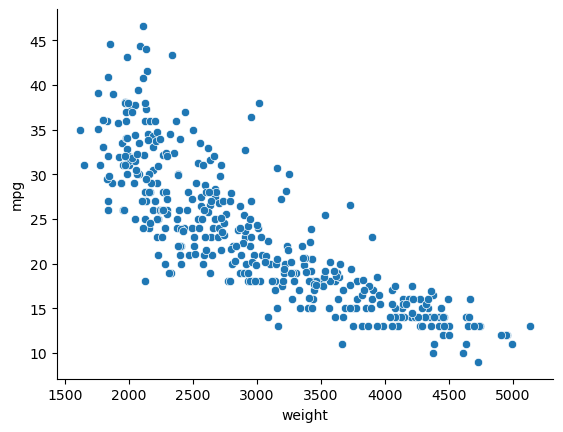

In [423]:
# linearity (mpg vs weight)

sns.scatterplot(model_fuel_df, x = 'weight', y = 'mpg')
sns.despine();
# the relationship is not fully linear - try log target

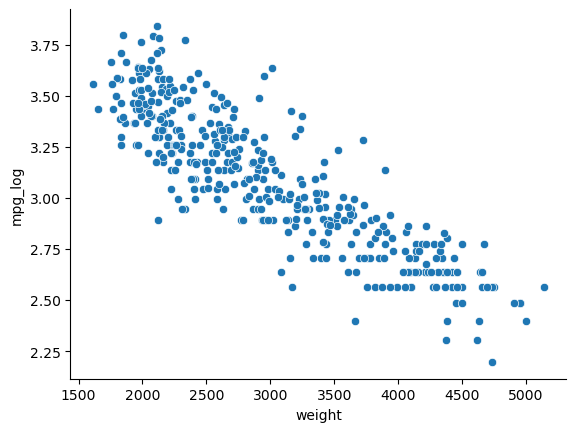

In [424]:
# check how log will impack linearity - conclusion: log target

model_fuel_df_log = pd.DataFrame({
    'weight': model_fuel_df['weight'],
    'mpg_log': np.log(model_fuel_df['mpg'])
})

sns.scatterplot(model_fuel_df_log, x='weight', y = 'mpg_log')
sns.despine();

In [425]:
# independence of errors

# DW = 1.985 (OK)

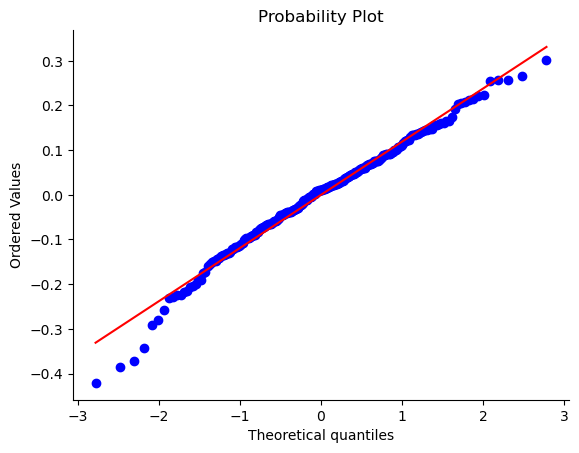

In [426]:
# normality of errors - use QQ plot 
# with just weight not perfect, create sq_weight

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist = 'norm', plot = plt)
sns.despine();

In [401]:
# with sq weight - doesn't look like much improvement, log transform on target had more impact, leave without sq

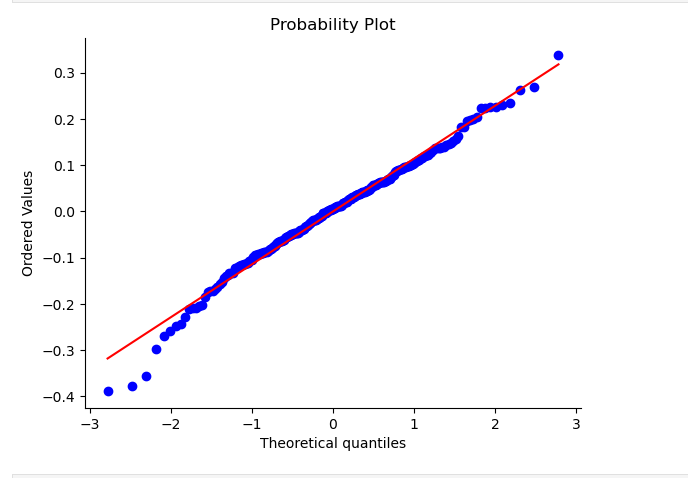

In [427]:
# no perfect multicollinearity (OK)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X_train.values, i) for i in range(X_train.shape[1])],
    index = X_train.columns
)

const         564.291681
weight          1.701755
model year      1.109023
origin_2        1.356887
origin_3        1.462878
dtype: float64

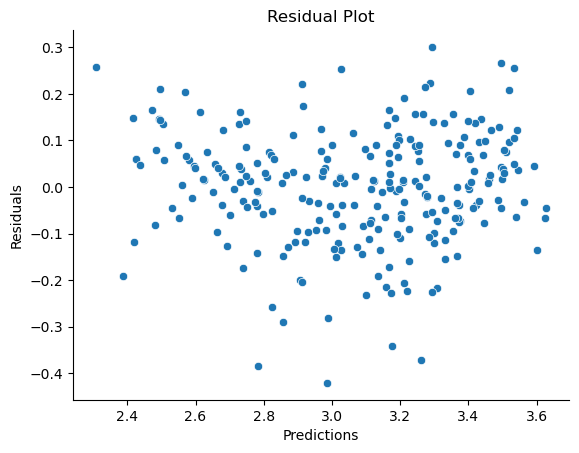

In [428]:
# equal variance of errors (OK)

predictions = model.predict()
residuals = model.resid

plot = sns.scatterplot(x = predictions, y = residuals)
plot.set_title('Residual Plot')
plot.set_xlabel('Predictions')
plot.set_ylabel('Residuals')
sns.despine()

plt.show()

### **Fit final model and score on test**

In [429]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     586.1
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          5.88e-144
Time:                        13:06:44   Log-Likelihood:                 226.67
No. Observations:                 318   AIC:                            -443.3
Df Residuals:                     313   BIC:                            -424.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4587      0.160      9.105      0.000       1.144       1.774
weight        -0.0003   1.04e-05    -27.475      0.000      -0.000      -0.000
model year     0.0325      0.002     16.856      0.000       0.029       0.036
origin_2       0.0808      0.021      3.933      0.000       0.040       0.121
origin_3       0.0643      0.021      3.053      0.002       0.023       0.106
==============================================================================
Omnibus:                       12.109   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.948
Skew:                          -0.343   Prob(JB):                     0.000568
Kurtosis:                       3.810   Cond. No.                     7.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [430]:
print('--- model on training AND validation data---')
print(f'Training R2: {r2(y, model.predict(X))}')
print(f'Training Exp MAE: {mae(np.exp(y), np.exp(model.predict(X)))}')
print()
print('--- score model on test data---')
print(f'Test R2: {r2(y_test, model.predict(X_test))}')
print(f'Test Exp MAE: {mae(np.exp(y_test), np.exp(model.predict(X_test)))}')

--- model on training AND validation data---
Training R2: 0.8822137448644207
Training Exp MAE: 2.0932352099714526

--- score model on test data---
Test R2: 0.8495100681549564
Test Exp MAE: 2.257175677214299


In [431]:
# very small gap between training and test data, no overfitting

### There were a number of hightly correlated features so the data set may be a good candidate for **Ridge Model**

In [456]:
# splitting data

features = [
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 # 'weight_sq',
 # 'acceleration',
 'model year',
 'origin_2',
 'origin_3'
]

X = sm.add_constant(model_fuel_df[features])
y = np.log(model_fuel_df['mpg'])

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [457]:
# standarisation

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_m = std.fit_transform(X.values) # test and valid data set
X_te = std.transform(X_test.values)

In [459]:
# Ridge Regressionb alpha tuning

from sklearn.linear_model import RidgeCV

# Declare the number of alphas to test
n_alphas = 200

# Create a list of alpha values on a logarithmic scale between 10^-3 and 10^3
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas = alphas, cv = 5)
ridge_model.fit(X_m, y)

print(f'Alpha: {ridge_model.alpha_}')
print('----')
print(f'Train R2: {ridge_model.score(X_m, y)}')
print(f'Train MAE: {mae(y, ridge_model.predict(X_m))}')

Alpha: 0.9658832241158698
----
Train R2: 0.8857480018095157
Train MAE: 0.08947435605008335


In [460]:
# ridge model fit

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.9659).fit(X_tr, y_train)

In [461]:
# retrieve coefficients

list(zip(X.columns, ridge_model.coef_))

[('const', 0.0),
 ('cylinders', -0.045162555969939004),
 ('displacement', 0.06776860191141251),
 ('horsepower', -0.023127191850388133),
 ('weight', -0.23464777990015523),
 ('model year', 0.12838031255481036),
 ('origin_2', 0.04330297752036272),
 ('origin_3', 0.03465573147623451)]

In [463]:
# check ridge report performance

print(f' Model R2: {ridge_model.score(X_m, y)}')
print(f' Model Exp MAE: {mae(np.exp(y), np.exp(ridge_model.predict(X_m)))}')
print('----')
print(f' Test R2: {ridge_model.score(X_te, y_test)}')
print(f' Test Exp MAE: {mae(np.exp(y_test), np.exp(ridge_model.predict(X_te)))}')

 Model R2: 0.8808511940592011
 Model Exp MAE: 2.157876707689148
----
 Test R2: 0.8388624761318156
 Test Exp MAE: 2.3020438867328687


## **Summary**

##### **Linear Regression Model:**

    Model R²: 0.8822 - Exp MAE: 2.0932
    Test R²: 0.8495 - Exp MAE: 2.2571

##### **Ridge Model:**

    Model R²: 0.8808 - Exp MAE: 2.1579
    Test R²: 0.8389 - Exp MAE: 2.302

The models shows a reasonable performance drop from the training data to the test data. While there is a decrease in R² and an increase in MAE, the changes are very slight and indicate no model overfitting.

## **Conclusion**

Based on the provided metrics, either model could be suitable for regression modeling. However, for simplicity and speed, I would choose the linear regression model. There is no strong reason to prefer the Ridge model given that Linear Regression model: 

1. has a **slightly higher R²** on the test set (0.8495 vs. 0.8389), indicating a marginally better fit.

2. has **slightly lower MAE** on the test set (2.2571 vs. 2.302), indicating marginally better predictive accuracy.
 
3. is **simpler and computationally less intensive** as it does not involve regularization, making it easier and faster to implement.